# Home Work 3 (100)
## (APANPK5335 Machine Learning)

## Submitted by: Eli Guo
## UNI: yg2869
### Posted: 10/3/2023 | Due: 10/16/2023 by 11:59 pm


#Question 1 (3 points)

For the following questions, please answer True/False or short answer as appropriate.

##1.1 (1 point)

Is logistic regression a regression model or a classification model? Justify you answer.

Answer: Logistic regression is primarily a classification model, despite its name suggesting otherwise. The model predicts the probability that a given instance belongs to a specific category, with its outputs bounded between 0 and 1 due to the logistic function. Though it produces a probability, a threshold is typically applied to determine class membership, emphasizing its role in classification. Furthermore, logistic regression can be extended to handle multiple classes, reinforcing its classification nature. The name "logistic regression" originates from its similarities to linear regression in predictor usage, but its main goal and methodology are undeniably centered on classification.

## 1.2 (1 point)

Is logistic regression an example of supervised learning?

Answer: True.

## 1.3 (1 point)

Which evaluation metrics can not be applied in case of logistic regression output to compare with target? Examples of evaluation metrics are AUC-ROC, Accuracy, Logloss, Mean-Squared-Error

Answer: Mean-Squared-Error (MSE) is typically not applied to evaluate the performance of logistic regression models. Logistic regression predicts probabilities, and its primary application is classification. MSE is designed for regression tasks where the model predicts continuous outputs. Applying MSE to classification tasks like logistic regression can lead to misleading results because it doesn't properly account for the categorical nature of the outcome. On the other hand, AUC-ROC, Accuracy, and Logloss are more appropriate metrics for evaluating the performance of logistic regression models, as they are designed to assess binary or categorical outcomes.

# Question 2 (4 points)

Consider a following model for logistic regression:
$P (y = 1 | x,\, w)= g(w_{0} + w_{1}x)$
where g(z) is the logistic function.
$g(z) = \frac{1}{(1+e^{-z})}$

In the above equation, the $P(y =1|x, w)$ can be viewed as a function of x, that we can get by changing the parameters w.

Given the equation for the logistic function, what is the minimal value that $y$ can take? What is the maximal value y can take? Do $w_0$ or $w_1$ affect the max and min? How does $w_0$ and $w_1$ affect the shape of the function?

Answer: Given the logistic function $g(z) = \frac{1}{(1+e^{-z})}$, as $z$ trends towards negative infinity, the function approaches 0. Conversely, as $z$ approaches positive infinity, the function nears 1. This means the minimal value that $y$ can take is 0, while the maximal value is 1.

The parameters $w_0$ and $w_1$ in the logistic regression model do not alter these bounds. Regardless of their values, the logistic function remains constrained between 0 and 1. However, these parameters significantly influence the function's behavior within this range.

The bias term, $w_0$, determines the value of $z$ when $x = 0$. Thus, it plays a role in the horizontal positioning of the sigmoid curve. Increasing $w_0$ results in a leftward shift, making the curve activate earlier for given values of $x$. On the other hand, decreasing $w_0$ moves the curve rightward, causing a delay in activation.

The weight of $x$, represented by $w_1$, dictates the curve's steepness. A high value for $w_1$ makes the function's transition from 0 to 1 more abrupt, meaning a slight change in $x$ can produce a dramatic shift in $y$. In contrast, a smaller $w_1$ value yields a gentler, more gradual transition.

In essence, while the logistic function's output is always bounded between 0 and 1, the parameters $w_0$ and $w_1$ mold its shape and position, determining how it reacts to different input values.

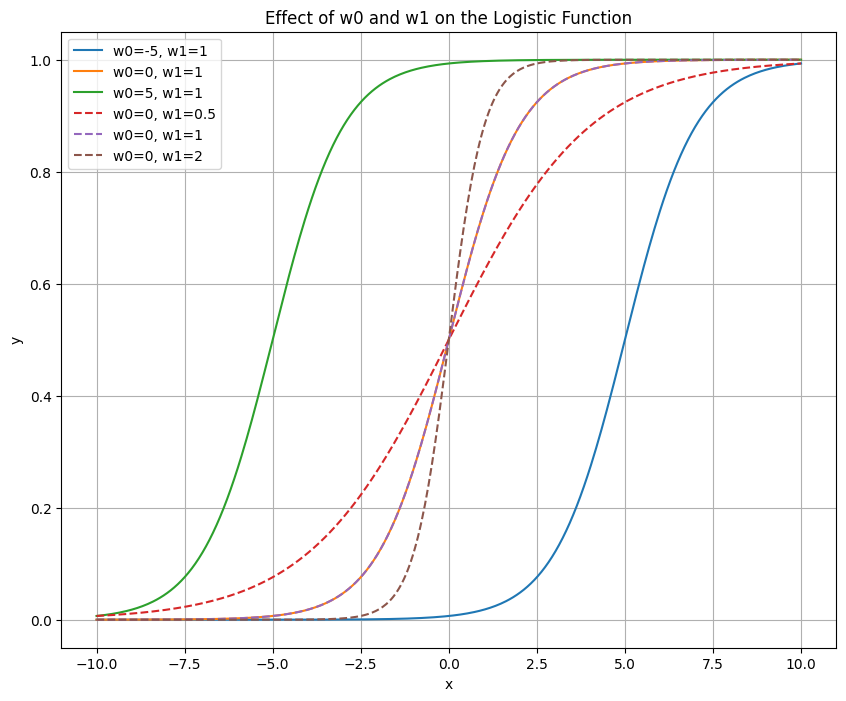

In [1]:
# Your code goes here
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(x, w0, w1):
    z = w0 + w1 * x
    return 1 / (1 + np.exp(-z))

# Define a range for x values
x = np.linspace(-10, 10, 400)

# Plot the logistic function for different values of w0 and w1
plt.figure(figsize=(10, 8))

# Keeping w1 constant and varying w0
for w0 in [-5, 0, 5]:
    plt.plot(x, logistic_function(x, w0, 1), label=f'w0={w0}, w1=1')

# Keeping w0 constant and varying w1
for w1 in [0.5, 1, 2]:
    plt.plot(x, logistic_function(x, 0, w1), '--', label=f'w0=0, w1={w1}')

plt.title('Effect of w0 and w1 on the Logistic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Question 3 (18 points)
On January 28, 1986, the NASA space shuttle Challenger had an accident. The vehicle broke apart and
disintegrated at 73 seconds into its flight, leading to the deaths of its seven crew members. The accident had
serious consequences for the NASA credibility and resulted in an interruption of 32 months in the shuttle program.
The Presidential Rogers Commission (formed by astronaut Neil A. Armstrong and Nobel laureate Richard P.
Feynman, among others) was created in order to investigate the causes of the disaster.

The Rogers Commission elaborated a report (Presidential Commission on the Space Shuttle Challenger Accident
1986) with all the findings. The commission determined that the disintegration began with the failure of an O-ring
seal in the solid rocket motor due to the unusually cold temperature (−0.6 Celsius degrees) during the launch. This
failure produced a breach of burning gas through the solid rocket motor that compromised the whole shuttle
structure, resulting in its disintegration due to the extreme aerodynamic forces.

This space shuttle used two booster rockets to help lift it into orbit. Each booster rocket consists of several pieces
whose joints are sealed with rubber O-rings (0.28 inches wide and 37.5 feet in diameter), which are designed to
prevent the release of hot gases produced during combustion. Each booster contains 3 primary Orings (for a total
of 6 for the orbiter).

In the 23 previous flights for which there were data (the hardware for one flight was lost at sea), the O-rings were
examined for damage.

One interesting question is the relationship of O-ring damage to temperature (particularly since it was (forecasted
to be) cold — 31F — on the morning of January 28, 1986).
There was a good deal of discussion among the Morton Thiokol (https://en.wikipedia.org/wiki/Thiokol
(https://en.wikipedia.org/wiki/Thiokol)) engineers the previous day as to whether the flight should go on as planned
or not.

Let’s analyze the dataset challenger challenger.csv

## 3.1 (2 point)

Our goal is to analyze the relationship between temperature and the probability of O-ring failure. Please identify the
dependent variable (label)?


In [2]:
# Your code goes here
import pandas as pd

challenger = pd.read_csv('challenger.csv')
challenger.head()

,Row,Date,Temp,Damaged,O-rings
0,1,4/12/1981,66,0,6
1,2,11/12/1981,70,1,6
2,3,3/22/1982,69,0,6
3,4,11/11/1982,68,0,6
4,5,4/4/1983,67,0,6


In [3]:
y = challenger['Damaged']

## 3.2 (4 point)

In which way was the temperature affecting the probability of O-ring incidents? Why if you run a linear regression
is not appropriate for this problem, perform one and test normality.

The temperature's relationship with the probability of O-ring incidents could be elucidated by the slope of the logistic regression model. If the coefficient associated with temperature is negative, it indicates that a decrease in temperature corresponds to an increased likelihood of O-ring damage. This conclusion would resonate with the real-world understanding that materials, like the O-rings, may become less flexible and more susceptible to failure as temperatures drop.

For this problem, linear regression might not be the most suitable modeling choice due to the nature of the dependent variable. The "Damaged" column represents a categorical outcome. Linear regression, when used to predict such categorical outcomes, can yield predictions outside the [0,1] range. These values are not interpretable as probabilities. Logistic regression, on the contrary, ensures predictions remain within this range, making them interpretable as probabilities.

Furthermore, linear regression operates under several assumptions, one of which is the normal distribution of residuals. When predicting binary outcomes using linear regression, this assumption can easily be violated.

Shapiro-Wilk normality test, p-value: 0.6331750750541687


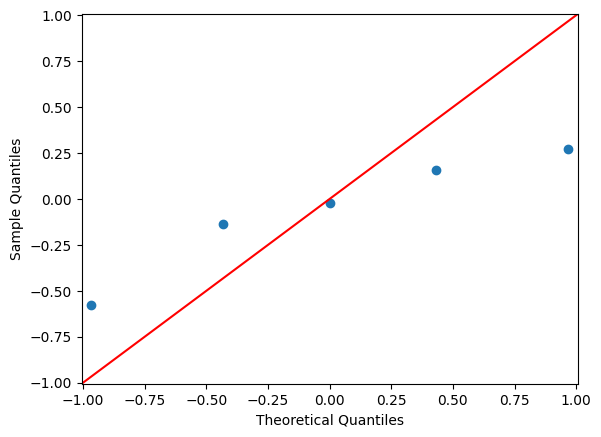

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats

# Define predictors and target variable
X = challenger[['Temp']]
y = challenger['Damaged']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
lin_reg = LinearRegression().fit(X_train, y_train)

# Predict using linear regression on test data
y_pred_linear = lin_reg.predict(X_test)

# Check residuals for normality
residuals = y_test - y_pred_linear
print("Shapiro-Wilk normality test, p-value:", stats.shapiro(residuals)[1])

# Visualize residuals using a QQ plot
sm.qqplot(residuals, line ='45')
plt.show()

## 3.3 (12 points)
Perform a logistic regression analysis,and please interpret the output, what is the meaning of the slope coefficient.
What was the predicted probability of an incident in an O-ring for the temperature of the launch day?

[HINT: The column "Damaged" refers to the number of O-rings that are damaged. There are 6 O-rings, so the values in the column "Damaged", can have values between 0 to 6. To fit this data into a logistic regression model, it would be best to convert the data in the "Damaged" column to  (or create a new column with)  binary data indicating whether the O-rings are damaged or not. This can be done by assuming that if the value of an entry in the "Damaged" column is 0, then it is not damaged, and if it is greater than 0, it is damaged.

Further, if needed, the probabilities of damage for each entry can be calculated by finding the ratio of number of damaged rings to the total number of O-rings( 1/6, 2/6 ...) ]

In [5]:
from sklearn.linear_model import LogisticRegression

# Convert 'Damaged' column to binary
challenger['Damaged_Binary'] = challenger['Damaged'].apply(lambda x: 1 if x > 0 else 0)

# Define predictors and target variable
X = challenger[['Temp']]
y = challenger['Damaged_Binary']

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Coefficient (slope) interpretation
slope = log_reg.coef_[0][0]
print("The slope coefficient is", slope)

The slope coefficient is -0.22950051284078973


Interpretation: The slope coefficient of −0.2295 in the logistic regression indicates that for every one-degree increase in temperature, the log odds of O-ring damage decrease by approximately 0.2295. Essentially, this suggests that colder temperatures elevate the risk of O-ring damage. The negative value emphasizes that the probability of damage is inversely related to temperature: as temperature drops, the risk of damage rises.

In [6]:
# Predicting for the launch day temperature
launch_temp = pd.DataFrame({'Temp': [31]})
predicted_prob = log_reg.predict_proba(launch_temp)[0][1]
print("The predicted probability of an O-ring incident at launch day temperature is", predicted_prob)

The predicted probability of an O-ring incident at launch day temperature is 0.999568327325372


# Question 4 (12 points)

When modeling, we want predictor variables that are correlated with the response variable. We do not want predictors correlated with each other. Interpredictor correlation may result in collinearity (also called multicollinearity), and can destabilize a model. If two predictor variables are nearly identical, our $\beta$ coefficients may change arbitrarily and cause the standard error (SE) to increase, hiding significant relationships between response and predictors. We can test for collinearity by computing a Variance Inflation Factor (VIF), which measures the association (correlation) among the predictor variables - excluding the response variable. It is given by:

$$
VIF = \frac{1}{(1-R^2_j)}
$$

$R^2$ measures how much one predictor is correlated with other predictors. When a predictor is totally uncorrelated (independent of) with others, then VIF = 1. As predictors approach complete collinearity (or extreme multicollinearity) with other predictors,VIF  $\rightarrow~\infty$.

Some people believe inter-predictor correlation may be too high when VIF becomes greater than 2.5, while others flag the correlation as problematic when VIF becomes greater than 10. Here, we will use VIF $> 10.$

## 4.1 (5 points)

Below, we will calculate VIF using predictors in the data `prostate_cancer.csv`.

Compute the coefficient of determination $R^2_j$  by regressing smoothness over
the other predictors in `prostate_cancer.csv`, but not for the response variable `diagnosis_result`. (Hint: use ols from statsmodels)

In [7]:
# Your code goes here
cancer = pd.read_csv('prostate_cancer.csv')
cancer.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [8]:
# Define predictors
X = cancer.drop(columns=['diagnosis_result', 'smoothness'])
X = sm.add_constant(X)  # Adding a constant for the intercept

# Define the response variable
y = cancer['smoothness']

# Compute the coefficient of determination R^2 using OLS regression
model = sm.OLS(y, X).fit()
r_squared = model.rsquared
print(f"The coefficient of determination R^2 for regressing 'smoothness' over other predictors is {r_squared}")

The coefficient of determination R^2 for regressing 'smoothness' over other predictors is 0.31222145977655213


## 4.2 (5 points)

Once you determine $R^2_j$ for `smoothness`, compute smoothness's VIF using the above formula. Separately, compute VIF for the other predictor variables. (Again, don't use the response variable `diagnosis_result`.)

In [9]:
# Your code goes here
vif_smoothness = 1 / (1 - r_squared)
print(f"VIF for smoothness: {vif_smoothness}")

VIF for smoothness: 1.4539563849653065


In [10]:
# Drop the response variable
cancer_pred = cancer.drop(columns=['diagnosis_result'])

# Function to compute VIF
def compute_vif(df, target):
    X = cancer_pred.drop(columns=[target])
    X = sm.add_constant(X)  
    y = cancer_pred[target]
    
    model = sm.OLS(y, X).fit()
    r_squared = model.rsquared
    
    return 1 / (1 - r_squared)

# Compute VIF for the other predictor variables
for column in cancer_pred.columns:
    if column != 'smoothness':
        vif_value = compute_vif(cancer_pred, column)
        print(f"VIF for {column}: {vif_value}")

VIF for id: 1.136837244630373
VIF for radius: 1.1135973249302213
VIF for texture: 1.055832340156885
VIF for perimeter: 41.51706059536235
VIF for area: 30.676793230063794
VIF for compactness: 9.695351216174556
VIF for symmetry: 2.098280479227244
VIF for fractal_dimension: 6.037699234905158


## 4.3 (2 points)
Would you say this dataset is collinear? If so, explain why. If not, how do you fix that?

Answer: The dataset displays collinearity, especially in the predictors `perimeter` and `area`, which have high VIF values exceeding the typical threshold of 10. This collinearity complicates the interpretation of each predictor's unique influence.

To address this issue, removing highly correlated predictors is a straightforward solution. For example, considering the probable correlation between `perimeter` and `area`, removing one might reduce the collinearity. Another method involves combining correlated predictors into a singular variable, reducing redundancy. Techniques like Ridge or Lasso regression, which penalize large coefficients often resulting from collinearity, are also beneficial. Principal Component Analysis (PCA) offers a transformation of the predictors to an uncorrelated set. It's also crucial to review the dataset for input errors or duplication, as these factors can lead to unintended collinearity. Addressing collinearity should align with both statistical outcomes and the specific context of the study.

# Question 5 (37 points)

Over the next 2 questions we will build a spam-ham Naive Bayes classifier. We will begin by loading and preprocessing real world data. We will use a few functions to load and process a Ham vs Spam data set using the Naive Bayes classifier.


## 5.1 (1 point)

Download the Ham vs Spam data set from the course website and extract it.

## 5.2 (2 points)

Create the readDirectory() method below that takes the directory name, reads all the files in it and pushes the content into a list. For example, if we have the directory has 3 files: File 1, File 2, and File 3. The list to be returned will look like:

`[File 1 content, File 2 content, File 3 content]`

In [11]:
import os

def readDirectory(dirname):
    # List all the files in the directory
    files = [f for f in os.listdir(dirname) if os.path.isfile(os.path.join(dirname, f))]
    
    content_list = []

    # Iterate through each file and read its content
    for file in files:
        with open(os.path.join(dirname, file), 'r') as f:
            content = f.read()
            content_list.append(content)
    
    return content_list

## 5.3 (4 points)

Use the readDirectory() method to load the ham_train, spam_train, ham_test, and spam_test datasets.

Note, you have to pass the correct base-directory into the data set.



In [12]:
ham_train = readDirectory('ham_vs_spam/ham_train')
spam_train = readDirectory('ham_vs_spam/spam_train')
ham_test = readDirectory('ham_vs_spam/ham_test')
spam_test = readDirectory('ham_vs_spam/spam_test')


## 5.4 (8 points)

Now, we will use WordNetLemmatizer from nltk to lemmatize the emails. Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Complete the function do_lemma that takes an email string as input and lemmatizes it. Apply this to ham_train, spam_train, ham_test, and spam_test datasets. Hint: Use nltk WordNetLemmatizer and use the function `get_wordnet_pos`.

In [13]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# mapping the POS tags
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def do_lemma(string):
    words = nltk.word_tokenize(string)  # Tokenize the email into words
    lemmatized_words = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in words]  # Lemmatize each word
    return ' '.join(lemmatized_words)  # Join the lemmatized words into a string

# Apply the do_lemma function to the datasets
ham_train = [do_lemma(email) for email in ham_train]
spam_train = [do_lemma(email) for email in spam_train]
ham_test = [do_lemma(email) for email in ham_test]
spam_test = [do_lemma(email) for email in spam_test]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yilinguo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yilinguo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yilinguo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yilinguo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 5.5 (6 points)

We need to preprocess the dataset. Complete the function preprocess(), that takes an email content in string format and removes the "Subject: " (the first 9 characters), punctuations, and stop words. Apply this to ham_train, spam_train, ham_test, and spam_test datasets. Hint: Create a set over stopwords and punctuations from NLTK.

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the set of English stopwords
stop_words = set(stopwords.words('english'))

# Set of punctuations
punctuations = set(string.punctuation)

def preprocess(email):
    # Remove "Subject: "
    email = email[9:]

    # Tokenize the email content
    words = word_tokenize(email)

    # Filter out stopwords and punctuations
    filtered_words = [word for word in words if word.lower() not in stop_words and word not in punctuations]

    # Join back the words into a processed string
    return ' '.join(filtered_words)

# Apply the preprocess function to the datasets
ham_train = [preprocess(email) for email in ham_train]
spam_train = [preprocess(email) for email in spam_train]
ham_test = [preprocess(email) for email in ham_test]
spam_test = [preprocess(email) for email in spam_test]

## 5.6 (2 points)

Complete the method `makeDictionaries`.

This returns two dictionaries:
<ul>
<li> Dictionary one maps words to their counts across all the documents.
<li> Dictionary two maps words to indices in reverse order of frequency.
</ul>



In [15]:
from collections import Counter
from nltk.tokenize import word_tokenize

def makeDictionaries(emails):
    # Tokenize and accumulate all words from all emails
    all_words = []
    for email in emails:
        all_words.extend(word_tokenize(email))
    
    # Count occurrences of each word
    word_counts = Counter(all_words)
    
    # Sort words by frequency in descending order and get the word list
    sorted_words = sorted(word_counts.keys(), key=lambda x: word_counts[x], reverse=True)
    
    # Create a dictionary that maps words to their indices based on descending frequency
    word_to_index = {word: index for index, word in enumerate(sorted_words)}
    
    return word_counts, word_to_index

## 5.7 (2 points)

Concatenate ham_train, spam_train, ham_test, and spam_test into a single list called all_emails. Use this list to create dictionary using the makeDictionaries() method.

In [16]:
# Concatenate the datasets
all_emails = ham_train + spam_train + ham_test + spam_test

# Use the makeDictionaries method
word_counts, word_to_index = makeDictionaries(all_emails)

## 5.8 (6 point)

Create the makeDocumentTermMatrix() method below. This method will create a document term matrix, which converts a data set into a matrix where each row represents a document and each column represents a word. Each element $e_{i,j}$ in the <i>document term matrix</i> is the number of times word $j$ appeared in document $i$.

In [17]:
import numpy as np
from nltk.tokenize import word_tokenize

def makeDocumentTermMatrix(emails, dictionary, indices):
    # Initialize a matrix of zeros
    dtm = np.zeros((len(emails), len(indices)))
    
    # Iterate over each email
    for i, email in enumerate(emails):
        words = word_tokenize(email)
        
        # Iterate over each word in the email
        for word in words:
            if word in dictionary:  # Only consider words that are in our dictionary
                # Increment the corresponding matrix element
                dtm[i, indices[word]] += 1
                
    return dtm

## 5.9 (6 points)

Use makeDocumentTermMatrix() to create dtm_ham_train, dtm_spam_train, dtm_ham_test, and dtm_spam_test using the the respective data from question 1.5 and the dictionary from 1.6.

Note: This could take a few minutes to run.

In [18]:
# Create the DTMs for each dataset
dtm_ham_train = makeDocumentTermMatrix(ham_train, word_counts, word_to_index)
dtm_spam_train = makeDocumentTermMatrix(spam_train, word_counts, word_to_index)
dtm_ham_test = makeDocumentTermMatrix(ham_test, word_counts, word_to_index)
dtm_spam_test = makeDocumentTermMatrix(spam_test, word_counts, word_to_index)

# Question 6 (17 points)

Now that we have preprocessed the data, we can now construct our Naive Bayes Classifier. We will classify a test document as ''spam'' if the following holds:

$$
p(y=\mathrm{spam}) \prod_{j=1}^n p(X_j=x_j^i | y=\mathrm{spam}) \geq p(y=\textrm{ham}) \prod_{j=1}^n p(X_j=x_j^i | y=\mathrm{ham}),
$$

where $p(X_j=x_j^i | y=\mathrm{spam})$ is the probability that word $j$ appears $x_j^i$ times in document $i$ when the document is labeled $\mathrm{spam}$.

Note that instead of using the the probability $p$, we will instead use the log-probability $\log p$ for numerical reasons. We also don't care about normalization because it does not impact our decision.



## 6.1 (1 point)

Create the makeLogPvec() method below  (for your convenience, it has been implemented):

In [19]:
def makeLogPvec(dtm, mu):
    # Sum up the number of instances per word
    pvecNoMu = np.sum(dtm, axis=0)
    # Sum up number of words
    nWords = np.sum(pvecNoMu)
    # Get dictionary size
    dicLen = len(pvecNoMu)
    # Incorporate mu and normalize
    logPvec = np.log(pvecNoMu + mu) - np.log(mu * dicLen + nWords)

    return logPvec

## 6.2 (4 points)

Use dtm_ham_train, dtm_spam_train, and dictionary to make log_pvec_ham and log_pvec_spam respectively. Set mu equal to $\frac{1}{|D|}$, where $|D|$ is the length of dictionary.

In [20]:
# Determine the length of the dictionary
dicLen = len(word_to_index)

# Calculate mu
mu = 1 / dicLen

# Use makeLogPvec method to calculate log_pvec_ham and log_pvec_spam
log_pvec_ham = makeLogPvec(dtm_ham_train, mu)
log_pvec_spam = makeLogPvec(dtm_spam_train, mu)

# Print results to check
print(log_pvec_ham)
print(log_pvec_spam)

[ -3.97312056  -4.12914463  -4.5629809  ... -23.48177138 -23.48177138
 -23.48177138]
[-22.08401242  -9.39668406  -4.63965459 ... -22.08401242 -22.08401242
 -22.08401242]


## 6.3 (6 points)

Create the predictNaiveBayes() method. This method should take in the log probabilities for the ham document and spam document, the prior probability for spam or ham, and a document term matrix to be classified. It then returns a vector of 0 or 1, where 0 means ham and 1 means spam.



In [21]:
def predictNaiveBayes(log_pvec_ham, log_pvec_spam, log_ham_prior, 
                      log_spam_prior, dtm_test):
    predictions = []

    for doc in dtm_test:
        # Calculate the sum of log probabilities for ham and spam
        ham_score = np.sum(log_pvec_ham * doc) + log_ham_prior
        spam_score = np.sum(log_pvec_spam * doc) + log_spam_prior

        # Append 1 if spam_score >= ham_score, else 0
        predictions.append(1 if spam_score >= ham_score else 0)

    return predictions

## 6.4 (6 points)

Use the predictNaiveBayes() method to calculate the accuracy, sensitivity (hit rate), and (1-specificity) false alarm rates for the test data sets.

In [22]:
# Calculate the number of ham and spam emails in the training data
n_ham = len(dtm_ham_train)
n_spam = len(dtm_spam_train)

# Calculate log priors
log_ham_prior = np.log(n_ham / (n_ham + n_spam))
log_spam_prior = np.log(n_spam / (n_ham + n_spam))

In [23]:
ham_predictions = predictNaiveBayes(log_pvec_ham, log_pvec_spam, log_ham_prior, log_spam_prior, dtm_ham_test)
spam_predictions = predictNaiveBayes(log_pvec_ham, log_pvec_spam, log_ham_prior, log_spam_prior, dtm_spam_test)

# True Positives
TP = sum(spam_predictions)
# True Negatives
TN = len(ham_predictions) - sum(ham_predictions)
# False Positives
FP = sum(ham_predictions)
# False Negatives
FN = len(spam_predictions) - sum(spam_predictions)

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Sensitivity
sensitivity = TP / (TP + FN)
# False alarm rate (1-Specificity)
false_alarm_rate = 1 - (TN / (TN + FP))

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Sensitivity: {sensitivity*100:.2f}%")
print(f"False Alarm Rate: {false_alarm_rate*100:.2f}%")

Accuracy: 99.05%
Sensitivity: 96.90%
False Alarm Rate: 0.28%


## Question 7 (9 points)


In [24]:
details = {
    'Color' : ['Green', 'Red', 'Red', 'Green', 'Red', 'Red', 'Green', 'Red',
               'Red', 'Red', 'Red', 'Yellow', 'Yellow', 'Yellow', 'Yellow'],
    'Shape' : ['Round', 'Round', 'Round', 'Round', 'Round', 'Round', 'Round',
              'Round', 'Round', 'Round', 'Round', 'Oval', 'Oval',
              'Oval', 'Round'],
    'Size' : [2.1, 1.9, 2, 1.8, 1.9, 2.1, 1.6, 1.7, 1.1, 1, 1.2, 2.8, 2.6, 2.5, 2.7],
    'Fruit': ['Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple',
              'Apple', 'Cherry', 'Cherry', 'Cherry', 'Lemon', 'Lemon',
              'Lemon', 'Lemon']
}

# creating a Dataframe object
df = pd.DataFrame(details)

print(df)

     Color  Shape  Size   Fruit
0    Green  Round   2.1   Apple
1      Red  Round   1.9   Apple
2      Red  Round   2.0   Apple
3    Green  Round   1.8   Apple
4      Red  Round   1.9   Apple
5      Red  Round   2.1   Apple
6    Green  Round   1.6   Apple
7      Red  Round   1.7   Apple
8      Red  Round   1.1  Cherry
9      Red  Round   1.0  Cherry
10     Red  Round   1.2  Cherry
11  Yellow   Oval   2.8   Lemon
12  Yellow   Oval   2.6   Lemon
13  Yellow   Oval   2.5   Lemon
14  Yellow  Round   2.7   Lemon


## 7.1 (3 points)

Calculate the probabilities of the following:

• P(apple)

• P(cherry)

• P(lemon)

In [25]:
# Your code goes here
total_fruits = len(df)
num_apples = len(df[df['Fruit'] == 'Apple'])
num_cherries = len(df[df['Fruit'] == 'Cherry'])
num_lemons = len(df[df['Fruit'] == 'Lemon'])

# Calculate probabilities
p_apple = num_apples / total_fruits
p_cherry = num_cherries / total_fruits
p_lemon = num_lemons / total_fruits

print(f"P(apple) = {p_apple}")
print(f"P(cherry) = {p_cherry}")
print(f"P(lemon) = {p_lemon}")

P(apple) = 0.5333333333333333
P(cherry) = 0.2
P(lemon) = 0.26666666666666666


## 7.2 (3 points)


Calculate conditional color probabilities:

• P(red | apple) =

• P(green | apple) =

• P(yellow | apple) =


In [26]:
# Your code goes here
red_apples = len(df[(df['Color'] == 'Red') & (df['Fruit'] == 'Apple')])
green_apples = len(df[(df['Color'] == 'Green') & (df['Fruit'] == 'Apple')])
yellow_apples = len(df[(df['Color'] == 'Yellow') & (df['Fruit'] == 'Apple')])

# Add mu apriori phantom observations equally in all categories
p_red_given_apple = (red_apples + 1/3) / (num_apples + 1)
p_green_given_apple = (green_apples + 1/3) / (num_apples + 1)
p_yellow_given_apple = (yellow_apples + 1/3) / (num_apples + 1)

print(f"P(red | apple) = {p_red_given_apple}")
print(f"P(green | apple) = {p_green_given_apple}")
print(f"P(yellow | apple) = {p_yellow_given_apple}")

P(red | apple) = 0.5925925925925926
P(green | apple) = 0.3703703703703704
P(yellow | apple) = 0.037037037037037035


## 7.3 (3 points)

Compute:

• P(apple | yellow,round,size < 2) $\propto$

• P(cherry | yellow,round,size < 2) $\propto$

• P(lemon | yellow,round,size < 2) $\propto$

Based on these values, which class would you choose?

In [27]:
yellow_cherries = len(df[(df['Color'] == 'Yellow') & (df['Fruit'] == 'Cherry')])
yellow_lemons = len(df[(df['Color'] == 'Yellow') & (df['Fruit'] == 'Lemon')])

round_apples = len(df[(df['Shape'] == 'Round') & (df['Fruit'] == 'Apple')])
round_cherries = len(df[(df['Shape'] == 'Round') & (df['Fruit'] == 'Cherry')])
round_lemons = len(df[(df['Shape'] == 'Round') & (df['Fruit'] == 'Lemon')])

under2_apples = len(df[(df['Size'] < 2) & (df['Fruit'] == 'Apple')])
under2_cherries = len(df[(df['Size'] < 2) & (df['Fruit'] == 'Cherry')])
under2_lemons = len(df[(df['Size'] < 2) & (df['Fruit'] == 'Lemon')])

p_yellow_given_cherry = (yellow_cherries + 1/3) / (num_cherries + 1)
p_yellow_given_lemon = (yellow_lemons + 1/3) / (num_lemons + 1)

p_round_given_apple = (round_apples + 1/2) / (num_apples + 1)
p_round_given_cherry = (round_cherries + 1/2) / (num_cherries + 1)
p_round_given_lemon = (round_lemons + 1/2) / (num_lemons + 1)

# Bin sizes to make discrete data: {size < 2}, {2 ≤ size < 2.5}, {size ≥ 2.5}
p_under2_given_apple = (under2_apples + 1/3) / (num_apples + 1)
p_under2_given_cherry = (under2_cherries + 1/3) / (num_cherries + 1)
p_under2_given_lemon = (under2_lemons + 1/3) / (num_lemons + 1)

In [28]:
p_apple_given_condition_propto = p_apple * p_yellow_given_apple * p_round_given_apple * p_under2_given_apple
p_cherry_given_condition_propto = p_cherry * p_yellow_given_cherry * p_round_given_cherry * p_under2_given_cherry
p_lemon_given_condition_propto = p_lemon * p_yellow_given_lemon * p_round_given_lemon * p_under2_given_lemon

print(f"P(apple | yellow,round,size < 2) ∝ {p_apple_given_condition_propto}")
print(f"P(cherry | yellow,round,size < 2) ∝ {p_cherry_given_condition_propto}")
print(f"P(lemon | yellow,round,size < 2) ∝ {p_lemon_given_condition_propto}")

P(apple | yellow,round,size < 2) ∝ 0.01105522532134329
P(cherry | yellow,round,size < 2) ∝ 0.012152777777777778
P(lemon | yellow,round,size < 2) ∝ 0.004622222222222221


Answer: Given the conditions of being yellow, round, and having a size less than 2, the fruit is most likely a cherry.